<a href="https://colab.research.google.com/github/datasolut/tutorials/blob/master/Supervised_Learning_02_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning 02 - Regression

## Flatfile einlesen

Daten stammen aus https://archive.ics.uci.edu/ml/datasets/online+retail und https://archive.ics.uci.edu/ml/datasets/Online+Retail+II.  
Wir nutzen Daten aus 2010 um Kundenwert für das Jahr 2011 vorherzusagen.  
Ein Flatfile wurde bereits vorbereitet.

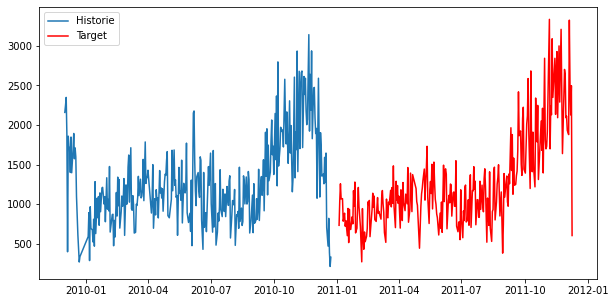

In [111]:
flatfile = pd.read_csv('drive/My Drive/Colab Models/ecommerce_flatfile.csv')
flatfile.head()

,customerid,rev_target,act_target,recency,num_invoices,num_dist_products,revenue,avg_invoice_value
0,17850,0.00,0.0,30,155,100,51208.87,330.379806
1,13047,2865.96,1.0,31,17,119,5557.62,326.918824
2,12583,5903.52,1.0,31,13,86,6590.06,506.927692
3,13748,744.25,1.0,31,5,22,1320.10,264.020000
4,15100,175.20,1.0,24,6,11,2018.70,336.450000


In [112]:
# wir beschränken uns auf Umsatzvorhersage bei Kunden mit positivem Umsatz (rev_target > 0)
flatfile = flatfile.loc[flatfile['rev_target']>0,:]
flatfile = flatfile.drop('act_target', axis=1)

print(flatfile.shape)

(2677, 7)


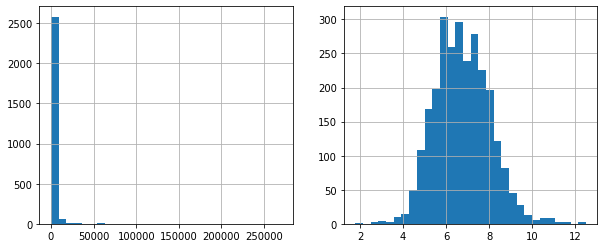

In [113]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
flatfile['rev_target'].hist(bins=30, ax=axes[0]);
np.log(flatfile['rev_target']).hist(bins=30, ax=axes[1]);

#df_customers['rev_target'] = np.log(df_customers['rev_target'])

In [114]:
# Transformation Prädiktoren auf log-Skala

log_columns = ['recency', 'num_invoices', 'num_dist_products', 'revenue', 'avg_invoice_value']
flatfile[log_columns] = flatfile[log_columns].apply(lambda x: np.log(x))

# Transformation Target auf log-Skala
flatfile['rev_target'] = np.log(flatfile['rev_target'])

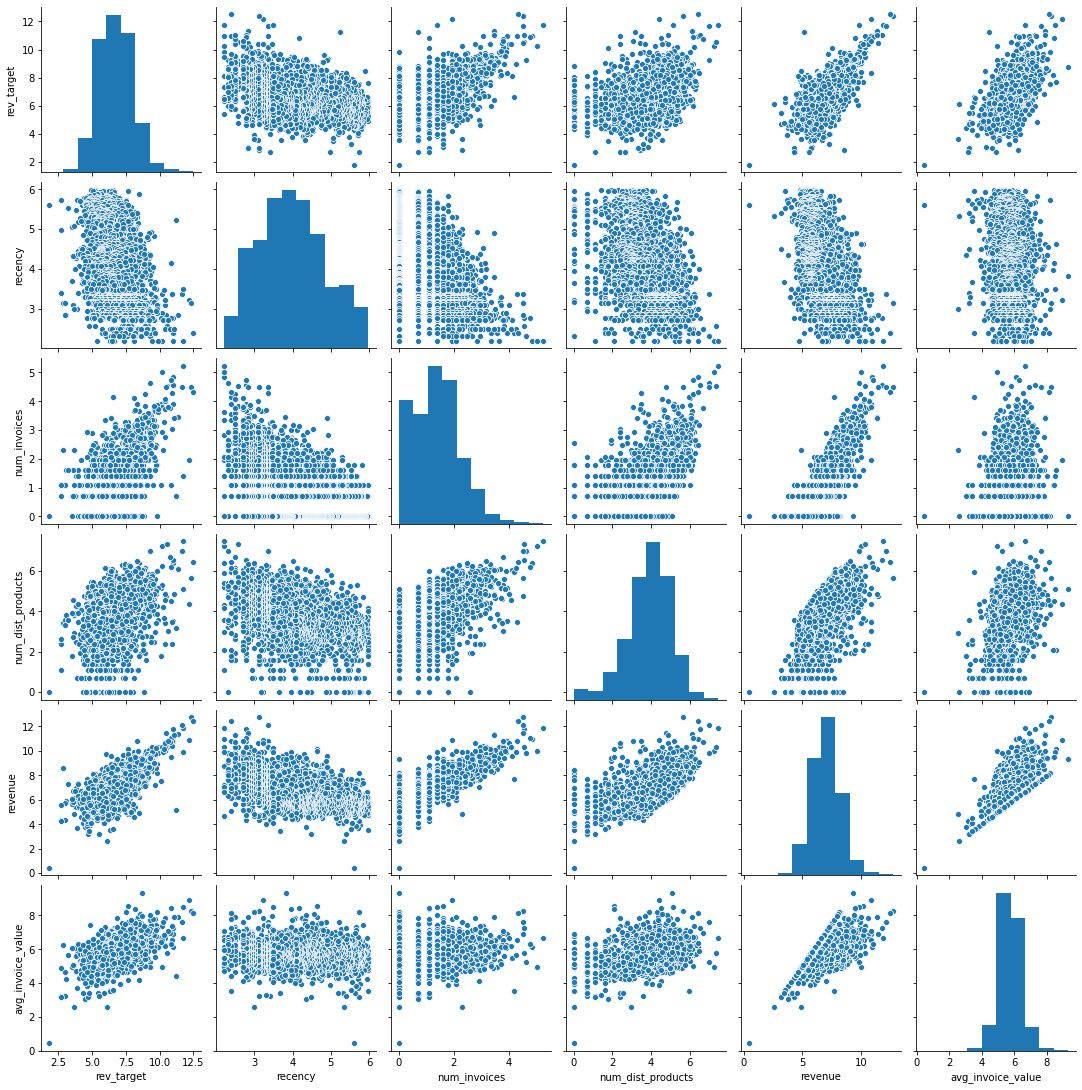

In [115]:
import seaborn as sns
sns.pairplot(data=flatfile.iloc[:, 1:]);

# Umsatzmodell


In [116]:
# Teile Daten in Prädiktoren und Zielvariable, anschließend in Trainings- und Testdatensätze 

from sklearn.model_selection import train_test_split

X = flatfile.drop(['customerid', 'rev_target'], axis=1)
y = flatfile['rev_target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [117]:
from sklearn.linear_model import LinearRegression, SGDRegressor

reg_model = SGDRegressor()

reg_model.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [118]:
y_predict = reg_model.predict(X_test)

In [119]:
from sklearn.metrics import explained_variance_score, mean_squared_log_error

print(explained_variance_score(y_test, y_predict))
print(mean_squared_log_error(y_test, y_predict))

0.5761086115980285
0.015442614454004671


In [120]:
pd.DataFrame(data=reg_model.coef_.reshape(1,5), columns=X_train.columns)

,recency,num_invoices,num_dist_products,revenue,avg_invoice_value
0,0.000862,0.167626,-0.091597,0.605551,0.437925


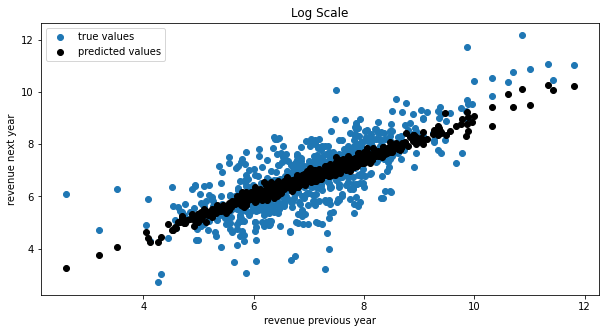

In [121]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['revenue'], y_test_log, label='true values')
plt.scatter(X_test['revenue'], y_rev_predict, color='k', label='predicted values')
plt.xlabel('revenue previous year')
plt.ylabel('revenue next year')
plt.legend();
plt.title('Log Scale');

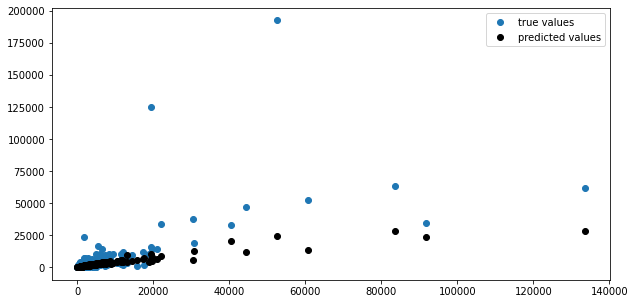

In [58]:
plt.figure(figsize=(10,5))
plt.scatter(np.exp(X_test['revenue']), np.exp(y_test_log), label='true values')
plt.scatter(np.exp(X_test['revenue']), np.exp(y_rev_predict), color='k', label='predicted values')
plt.legend();

In [122]:
import pickle

with open('drive/My Drive/Colab Models/reg_model.pickle', 'wb') as f:
    pickle.dump(reg_model, f)